### Library Imports

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

### Load Audio Databases 

In [2]:
TESS = "../data/TESS Toronto emotional speech set data/"
RAV = "../data/RAV/audio_speech_actors_01-24/"
SAVEE = "../data/SAVEE/"
CREMA = "../data/AudioWAV/"

### Loading in SAVEE Dataset (Surrey Audio-Visual Expressed Emotion)

1. SAVEE dataset
    The audio files are named in such a way that the prefix letters describes the emotion classes as follows:

        '_a' = 'anger'
        '_d' = 'disgust'
        '_f' = 'fear'
        '_h' = 'happiness'
        '_n' = 'neutral'
        'sa' = 'sadness'
        'su' = 'surprise'

In [3]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)
    
# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_happy        60
male_surprise     60
male_sad          60
male_angry        60
male_fear         60
male_disgust      60
Name: labels, dtype: int64

### Loading in RAVDESS Dataset (Ryerson Audio-Visual Database of Emotional Speech and Song)

In [4]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
female_disgust      96
male_surprise       96
male_fear           96
male_happy          96
male_angry          96
female_angry        96
female_sad          96
female_fear         96
female_happy        96
female_surprise     96
male_sad            96
male_disgust        96
Name: labels, dtype: int64

### Loading in the TESS Dataset (Toronto emotional speech set)

In [5]:
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS+ i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_angry       400
female_neutral     400
female_fear        400
female_surprise    400
female_disgust     400
female_sad         400
female_happy       400
Unknown             14
Name: labels, dtype: int64

### Loading in the CREMA-D Dataset (Crowd-Sourced Emotional Multimodal Actors Dataset)

In [6]:
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


female_disgust     1000
female_sad         1000
female_happy       1000
female_angry       1000
female_fear        1000
female_neutral      912
male_happy          671
male_disgust        671
male_angry          671
male_fear           671
male_sad            671
male_neutral        575
female_surprise     400
Unknown              14
Name: labels, dtype: int64

### Grouping All Audio Data Into One DataFrame

In [7]:
df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Emotional_audio_df.csv",index=False)

female_disgust     1496
female_sad         1496
female_happy       1496
female_angry       1496
female_fear        1496
female_neutral     1456
female_surprise     896
male_neutral        839
male_happy          827
male_disgust        827
male_angry          827
male_fear           827
male_sad            827
male_surprise       156
Unknown              28
Name: labels, dtype: int64


## Loading in Emotion Image Data

In [2]:
df = pd.read_csv('../data/fer2013.csv')

In [3]:
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [4]:
training_df = df[df['Usage'] == 'Training']
validation_df = df[df['Usage'] == 'PublicTest']
test_df = df[df.Usage == 'PrivateTest']

In [8]:
def fer2013_show_instance(index):
    """Shows the image and the emotion label of the index's instance."""
    image = np.reshape(training_df.at[index, "pixels"].split(" "), (48, 48)).astype("float")
    image -= np.mean(image)
    image /= np.std(image)
    print(Emotions[training_df.at[index, "emotion"]])
    plt.imshow(image, cmap="gray")

Sad


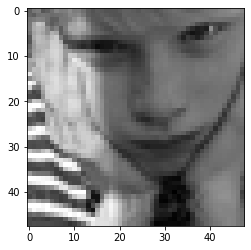

In [13]:
fer2013_show_instance(np.random.randint(0,len(training_df)))

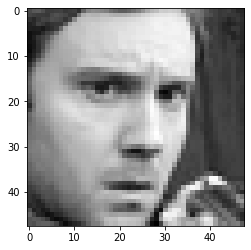

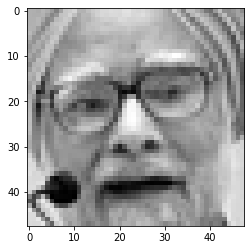

In [26]:
for ix in range(2):
    plt.figure(ix)
    plt.imshow(X[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

In [ ]:
import Image.live_image
%load_ext autoreload
%autoreload 2

Loading Model...












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


